## Data Preprocessing

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as st


## Import Data

In [2]:

data= pd.read_csv('Table - IN_Table.csv.csv')
data.describe()

IN1           IN2           IN3           IN4           IN5  \
count  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04   
mean  -3.911535e-12 -1.658765e-12 -2.405762e-12  2.957421e-12  1.521103e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.696646e+00 -3.437986e+00 -2.639204e+00 -2.354538e+00 -1.934470e+00   
25%   -3.385843e-01 -9.371822e-01 -3.013195e-01 -8.791605e-01 -7.130980e-01   
50%    3.617588e-01  5.709954e-01  2.248603e-01  5.034075e-01 -4.158845e-02   
75%    6.842442e-01  7.610581e-01  4.011428e-01  8.862316e-01  5.721888e-01   
max    1.590639e+00  1.939639e+00  1.844610e+00  1.654608e+00  3.615581e+00   

               Out1          Out2  
count  1.440100e+04  1.440100e+04  
mean   3.521351e-11  8.724543e-13  
std    1.000000e+00  1.000000e+00  
min   -5.201644e+00 -5.989071e+00  
25%   -5.060039e-01 -5.130819e-01  
50%    1.648018e-01 -3.687546e-03  
75%    6.439487e-01  5.057068e-01  
max    1.396423e+01  7.637227e+00

In [3]:
data.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.500407  0.924350  0.438273  0.455514  0.624829  0.381853
IN2   0.500407  1.000000  0.321950  0.895081  0.081605  0.388346  0.201564
IN3   0.924350  0.321950  1.000000  0.197927  0.365890  0.572199  0.415136
IN4   0.438273  0.895081  0.197927  1.000000  0.013679  0.301107  0.203665
IN5   0.455514  0.081605  0.365890  0.013679  1.000000  0.428711  0.101761
Out1  0.624829  0.388346  0.572199  0.301107  0.428711  1.000000 -0.151741
Out2  0.381853  0.201564  0.415136  0.203665  0.101761 -0.151741  1.000000

## Removing the outliers


In [4]:
#the median method gave higher accuracy than the mean.
def outlier(data):
    for column in data.columns:
        data[column] = data[column].astype(float)
        mean = st.median(data[column])
        std_dev = np.std(data[column])
        lower_bound = mean - 3.21 * std_dev
        upper_bound = mean + 3.21 * std_dev
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data
data_c = outlier(data)
data_c.describe()

IN1           IN2           IN3           IN4           IN5  \
count  14176.000000  14176.000000  14176.000000  14176.000000  14176.000000   
mean       0.009382      0.014270      0.006200      0.015347     -0.000104   
std        0.992595      0.994712      0.991941      0.995247      0.990093   
min       -2.696646     -2.534229     -2.631096     -2.354538     -1.934470   
25%       -0.296903     -0.921675     -0.295194     -0.878523     -0.709896   
50%        0.365294      0.607283      0.225387      0.512090     -0.040223   
75%        0.683844      0.762325      0.400967      0.887047      0.572440   
max        1.590639      1.939639      1.844610      1.654608      3.161070   

               Out1          Out2  
count  14176.000000  14176.000000  
mean      -0.000980     -0.007083  
std        0.934781      0.906343  
min       -2.997568     -3.060053  
25%       -0.506004     -0.513082  
50%        0.164802     -0.003688  
75%        0.643949      0.505707  
max        3.327171      3.052678

###Plotting The Graphs

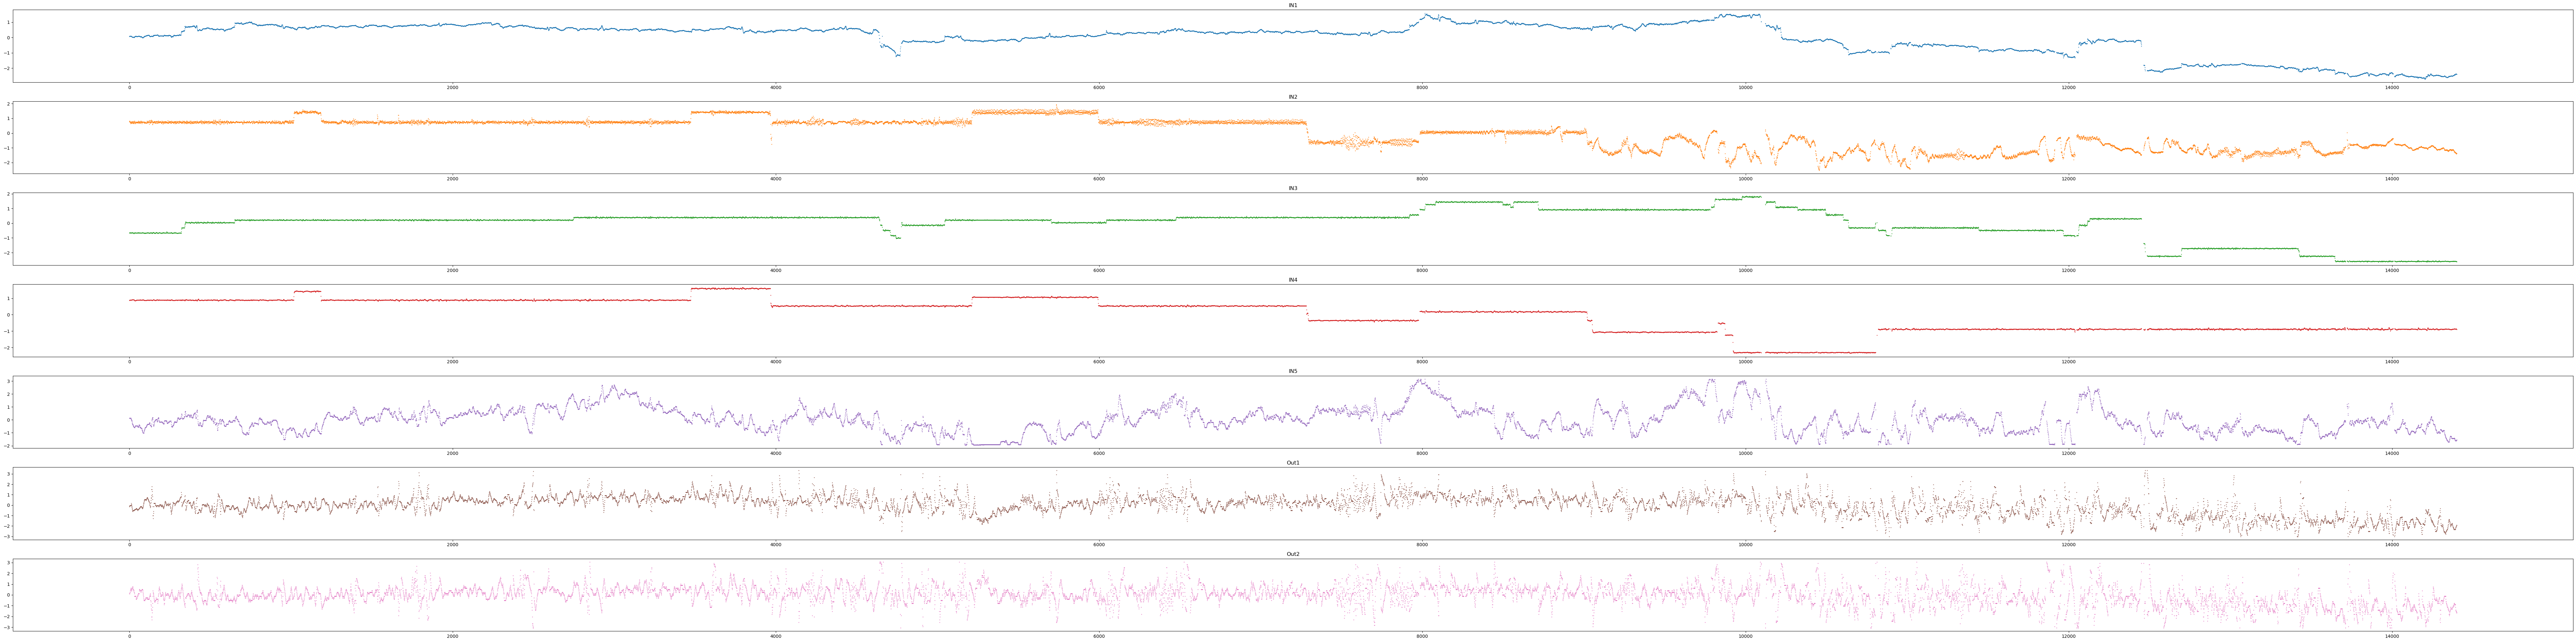

In [5]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1),s=2)
    plt.title(col)

plt.tight_layout()

plt.show()

In [6]:
data_c.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.506149  0.923903  0.443309  0.456284  0.671510  0.434053
IN2   0.506149  1.000000  0.328303  0.896780  0.075256  0.408026  0.244803
IN3   0.923903  0.328303  1.000000  0.202082  0.368440  0.624368  0.455896
IN4   0.443309  0.896780  0.202082  1.000000  0.014609  0.326593  0.234142
IN5   0.456284  0.075256  0.368440  0.014609  1.000000  0.447622  0.138358
Out1  0.671510  0.408026  0.624368  0.326593  0.447622  1.000000 -0.025025
Out2  0.434053  0.244803  0.455896  0.234142  0.138358 -0.025025  1.000000

### Error Details

In [7]:
def results(Y_pred,Y_test,M):
  from sklearn.metrics import mean_squared_error,r2_score

  SSE= mean_squared_error(Y_pred,Y_test)
  MSE= np.mean((y1_test - y1_pred) **2)
  n=len(Y_test)

  AIC = M*2         +n*(np.log(SSE/n))
  BIC = M*np.log(n) +n*(np.log(SSE/n))


  print('R2  : ', r2_score(Y_pred,Y_test))
  print('SSE : ', SSE )
  print('MSE : ', MSE )

  print('aic : ', AIC)
  print('bic : ', BIC)

# Plot

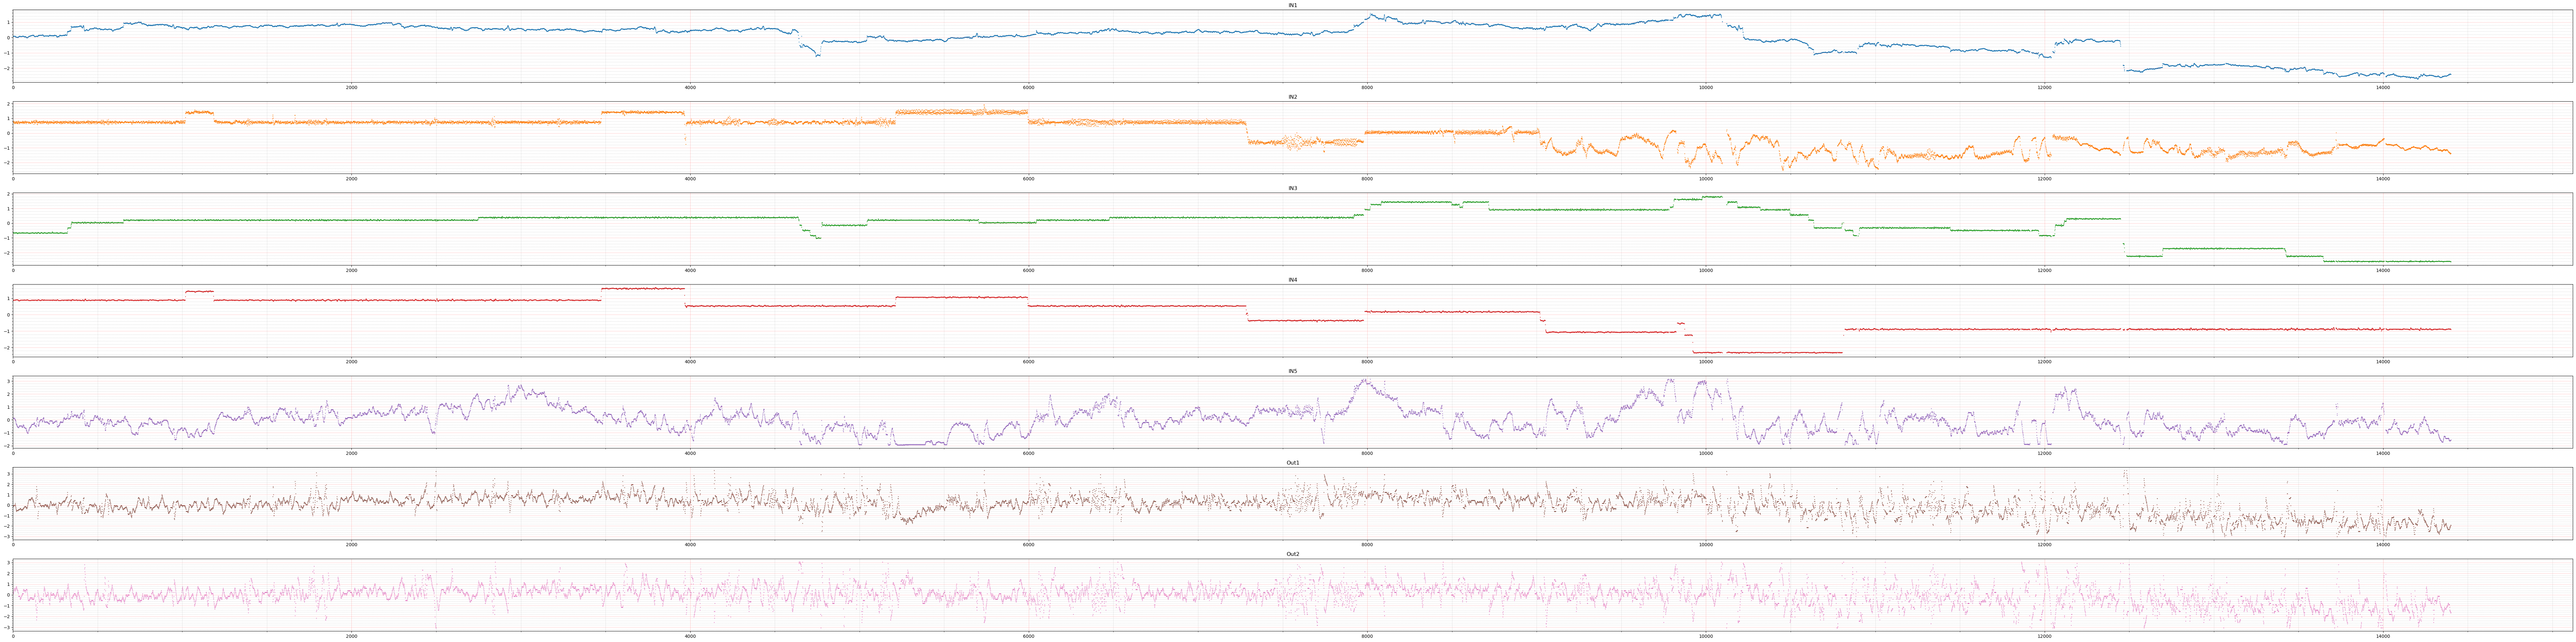

In [8]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data_c.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1), s=2)
    plt.title(col)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.3)
    plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(left=0)

plt.tight_layout()
plt.show()


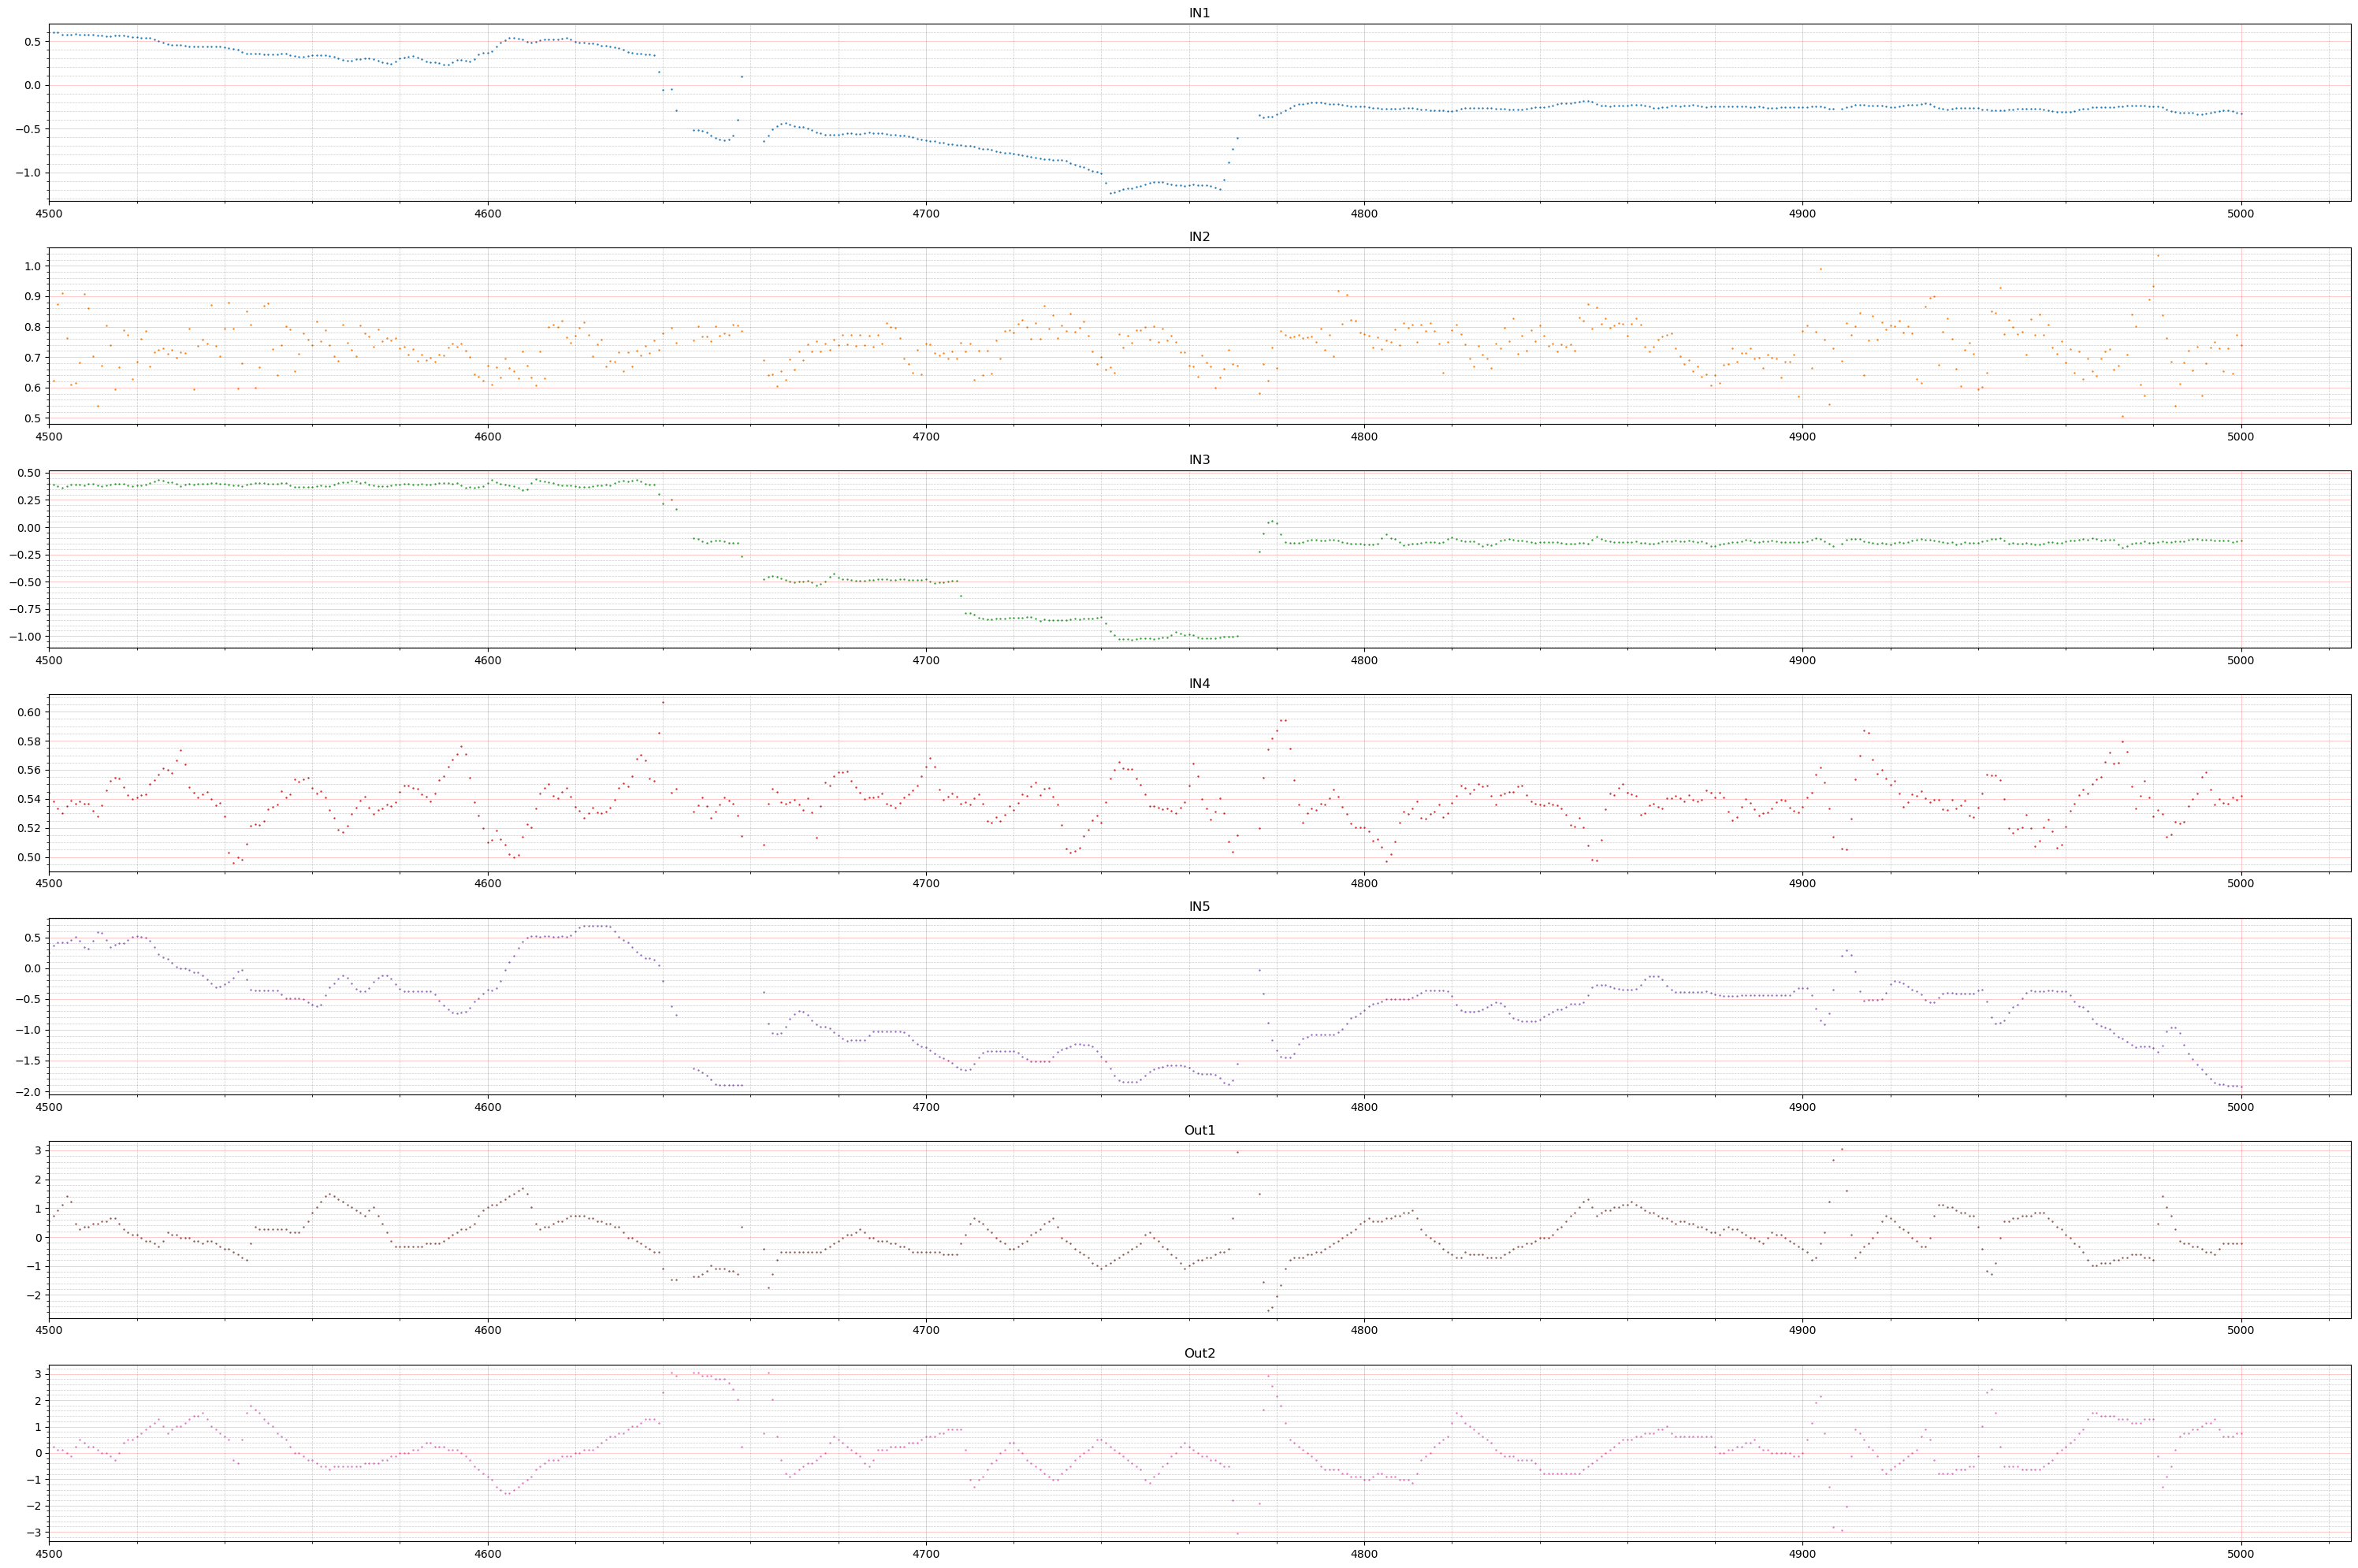

In [9]:
illust_data = data_c[(data_c.index >= 4500) & (data_c.index <= 5000)]
plt.figure(figsize=(30, 20))

for i, col in enumerate(illust_data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(illust_data.index, illust_data[col], marker='.', color='C{}'.format(i-1), s=2)
    plt.title(col)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.3)
    plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(left=4500)


plt.tight_layout()
plt.show()


# Error And Plot

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import pi, log

def result(y_test, y_pred, k):
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    SSE = mean_squared_error(y_test, y_pred) * n
    MAE = mean_absolute_error(y_test, y_pred)
    aic = 2 * k + n * log(2 * pi) + n * log(SSE / n) + n
    bic = k * log(n) + n * log(2 * pi) + n * log(SSE / n) + n

    # Print metrics
    print('R2 Score:', r2)
    print('SSE:', SSE)
    print('MAE:', MAE)
    print('AIC:', aic)
    print('BIC:', bic)

    # Plot actual vs predicted values
    plt.figure(figsize=(24, 6))
    start_index, end_index = 1000, 1300
    plt.plot(range(start_index, end_index), y_test[start_index:end_index], color='blue', label='Actual SO2', linewidth=1.5)
    plt.plot(range(start_index, end_index), y_pred[start_index:end_index], color='red', label='Predicted SO2', linewidth=1.5)

    # Add labels, title, and legend
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('SO2 Value', fontsize=12)
    plt.title(f'SO2 Actual vs Predicted (Indices {start_index}-{end_index})', fontsize=14)
    plt.legend(fontsize=12)

    # Add grids
    plt.grid(which='major', linestyle=':', linewidth=0.7, color='gray', alpha=0.8)
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.5)
    plt.minorticks_on()

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    # Add the R2 score
    plt.text(
        end_index - 50,
        max(y_test[start_index:end_index]),
        f"$R^2$ = {r2:.4f}",
        fontsize=12,
        color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

    # Show the plot
    plt.tight_layout()
    plt.show()


# KNN

In [11]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out2']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
y_pred_knn = knn.predict(X_test)

R2 Score: 0.496096954770457
SSE: 1152.4485692933376
MAE: 0.4252137293528299
AIC: 5504.38508419553
BIC: 5534.135833633789


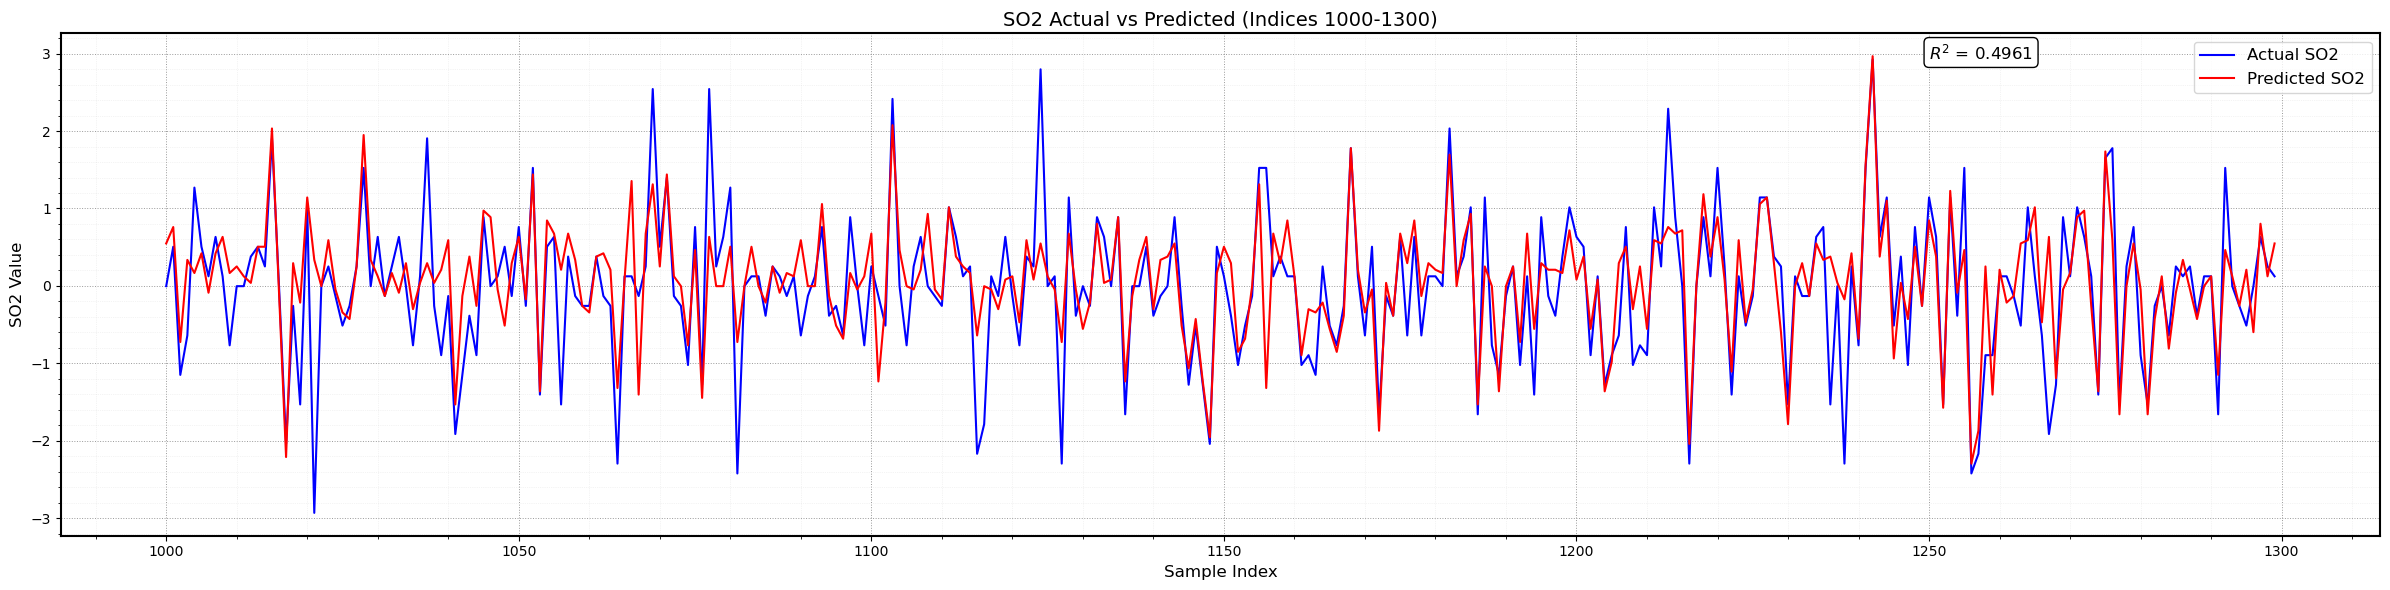

In [15]:
result(y_test,y_pred_knn,5)

# Polynomial Regression

In [16]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_poly = poly_reg.predict(X_test)

R2 Score: 0.6819383140849351
SSE: 761.1125385225798
MAE: 0.38440353024632207
AIC: 4327.8338453907345
BIC: 4357.584594828993


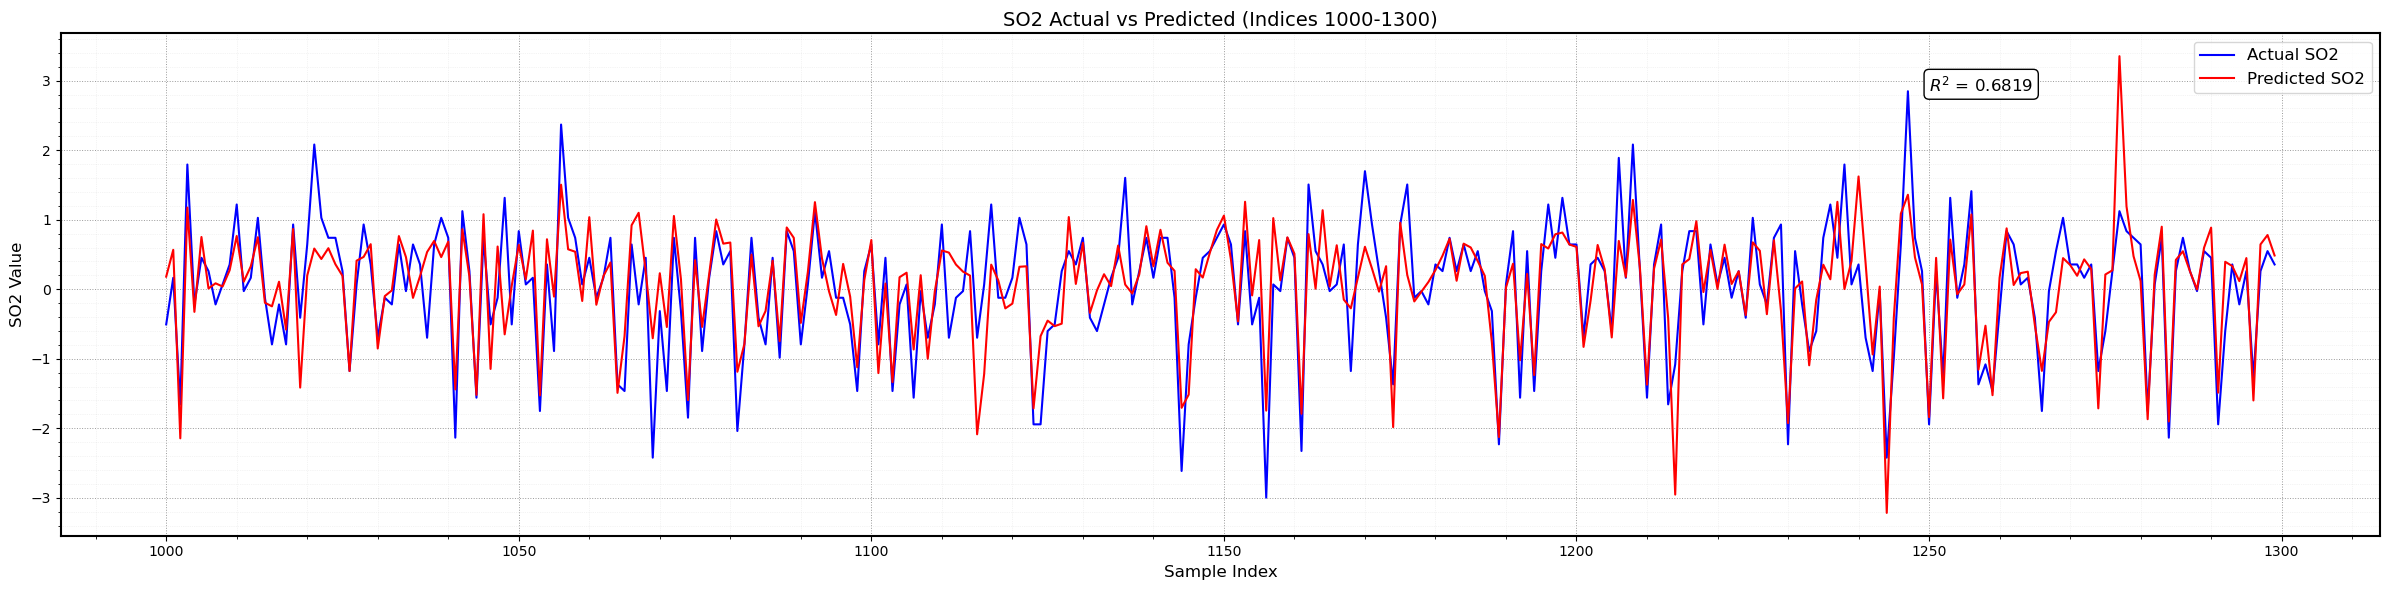

In [21]:
result(y_test,y_pred_poly,5)

# Linear Regression

In [22]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred_lin = lin_reg.predict(X_test)

R2 Score: 0.5018031909037723
SSE: 1192.1707481495778
MAE: 0.47383113314315556
AIC: 5600.488428808438
BIC: 5630.239178246698


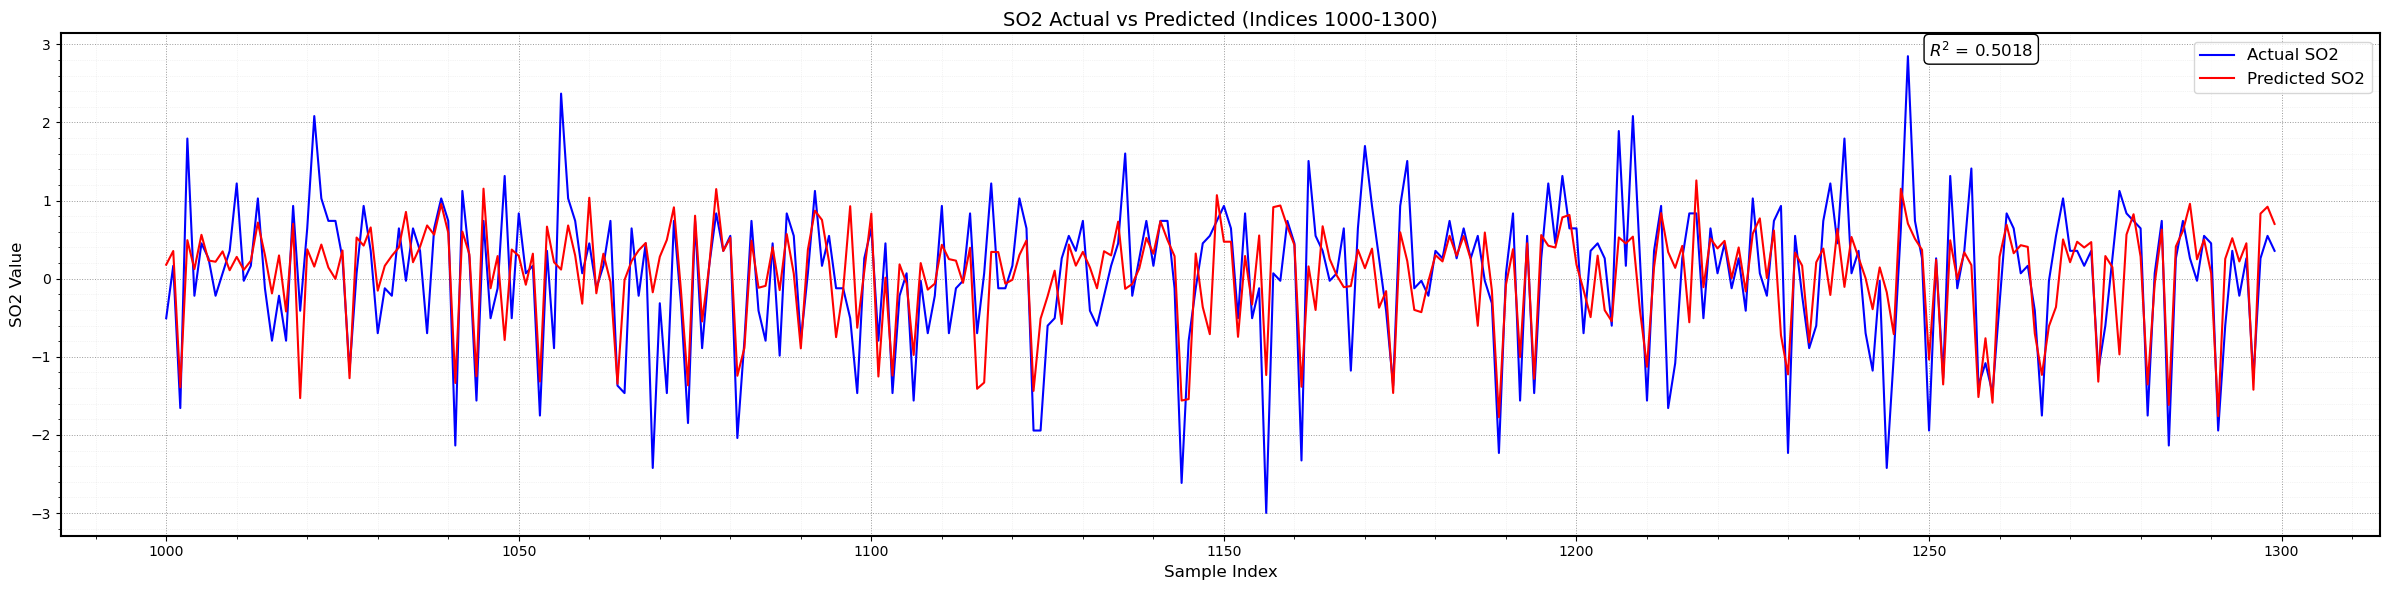

In [26]:
result(y_test,y_pred_lin,5)

# Early Stopping Funtion

In [27]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="loss",
    min_delta = 0.0001,
    patience = 200,
    restore_best_weights = True,
)

In [28]:
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = self.model.predict(val_x)
        r2 = r2_score(val_y, val_predictions)
        self.r2_scores.append(r2)
        if epoch % 20 == 0 and epoch != 0:
            print(f"Epoch {epoch}: R2 Score = {r2}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        plt.plot(self.r2_scores, label='R² Score')
        plt.xlabel('Epoch')
        plt.ylabel('R2 Score')
        plt.title('R2 Score over Epochs')
        plt.legend()
        plt.show()



# Neural Network

In [29]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
#first layer
#ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
#second layer
#ann.add(tf.keras.layers.Dense(units = 50,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

#output
ann.add(tf.keras.layers.Dense(units=1))
#compiling
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
ann.fit(X_train,y_train,batch_size = 16,callbacks = [r2_callback],epochs = 300)


Epoch 1/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4597 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4589 - mae: 0.4945
Epoch 2/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.4175 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4173 - mae: 0.4699
Epoch 3/300
444/709 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3841 - mae: 0.4552

KeyboardInterrupt: 

In [ ]:
ann_df = pd.DataFrame(ann.history.history)
ann_df['loss'].plot()

In [ ]:
y_pred_ann = ann.predict(X_test)

In [ ]:
result(y_test,y_pred_ann,5)

In [ ]:
ann.summary()

# LSTM - timesteps

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = data_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = data_c.loc[:, 'Out1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

lstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=50 ,activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    #layers.LSTM(units=50 activation='tanh',return_sequences = True),
    #layers.Dropout(0.05),
    layers.LSTM(units=50,activation='tanh'),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))

lstm_model.fit(X_train, y_train, batch_size=32,callbacks = [r2_callback], epochs=1000)


In [ ]:
lstm_model_df = pd.DataFrame(lstm_model.history.history)
lstm_model_df['loss'].plot();

In [ ]:
y_pred_lstm = lstm_model.predict(X_test)
result(y_test,y_pred_lstm,5)

In [ ]:
lstm_model.summary()

# LSTM no-timesteps

In [ ]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential()

model.add(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.1))
#output
model.add(tf.keras.layers.Dense(units=1))
#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [ ]:
y_pred_model = model.predict(X_test)
result(y_test,y_pred_model,5)

In [ ]:
model.summary()

## Bi-directional LSTM

In [ ]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential([
    Bidirectional(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5))),
    tf.keras.layers.Dropout(0.05),
    Bidirectional(LSTM(units = 256,activation='tanh',return_sequences=True)),
    tf.keras.layers.Dropout(0.05),
    Bidirectional(LSTM(units = 256,activation='tanh')),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=1),
])


#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [ ]:
y_pred_bi = model.predict(X_test)
result(y_test,y_pred_bi,5)

# PCA

In [ ]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnp = KNeighborsRegressor(n_neighbors = 200)
knnp.fit(X_train,y_train)

In [ ]:
y_pred_knnp = knnp.predict(X_test)
result(y_test,y_pred_knnp,3)

In [ ]:

result(y_test,y_pred_bilstm,5)

In [ ]:
import matplotlib.pyplot as plt
# Assuming y_test is the actual data, and y_pred_lstm and y_pred_bilstm are the predictions from LSTM and BiLSTM models respectively.
#np.save('y_test.npy', y_test)  # Save as NumPy file
#y_test = np.load('y_test.npy')
#y_pred_lstm = np.load('y_pred_lstm.npy')
#y_pred_bi = np.load('y_pred_bi.npy')


# Plot the results
plt.figure(figsize=(20, 6))  # Adjusted size for better visualization
plt.plot(y_test, label='Actual Data', color='blue', linestyle='dashed', linewidth=2)
plt.plot(y_pred_lstm, label='LSTM Predictions', color='orange', linestyle='solid', linewidth=2)
plt.plot(y_pred_bilstm, label='Bi-LSTM Predictions', color='green', linestyle='solid', linewidth=2)

# Add labels, legend, and title
plt.xlabel('Time Steps', fontsize=16)
plt.ylabel('Values', fontsize=16)
#plt.title('Comparison of LSTM and Bi-LSTM Predictions Against Actual Data', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16, loc='lower right', frameon=True, shadow=True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.xlim(0, len(y_test) - 1)  # Adjust 0 and max index as needed
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')  # High-resolution output
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test, y_pred_lstm, and y_pred_bilstm are loaded as NumPy arrays.
# Example loading code:
# y_test = np.load('y_test.npy')
# y_pred_lstm = np.load('y_pred_lstm.npy')
# y_pred_bilstm = np.load('y_pred_bilstm.npy')

# Define the range of indices to plot
start_index = 1000
end_index = 1150

# Slice the arrays to the desired range
y_test_range = y_test[start_index:end_index]
y_pred_lstm_range = y_pred_lstm[start_index:end_index]
y_pred_bilstm_range = y_pred_bilstm[start_index:end_index]

# Plot the results
plt.figure(figsize=(20, 6))  # Adjusted size for better visualization
plt.plot(y_test_range, label='Actual Data', color='blue', linestyle='dashed', linewidth=2)
plt.plot(y_pred_lstm_range, label='LSTM Predictions', color='orange', linestyle='solid', linewidth=2)
plt.plot(y_pred_bilstm_range, label='Bi-LSTM Predictions', color='green', linestyle='solid', linewidth=2)

# Add labels, legend, and title
plt.xlabel('Time Steps (1000-1150)', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.title('Comparison of LSTM and Bi-LSTM Predictions Against Actual Data (Range: 1000-1150)', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16, loc='lower right', frameon=True, shadow=True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.xlim(0, end_index - start_index - 1)  # Adjust to match the sliced data
plt.tight_layout()
plt.savefig("graph_range_1000_1150.png", dpi=300, bbox_inches='tight')  # High-resolution output
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Assuming y_test, y_pred_lstm, and y_pred_bilstm are loaded as NumPy arrays.
# Example loading code:
# y_test = np.load('y_test.npy')
# y_pred_lstm = np.load('y_pred_lstm.npy')
# y_pred_bilstm = np.load('y_pred_bilstm.npy')

# Define the range of indices to plot
start_index = 1000
end_index = 1150

# Slice the arrays to the desired range
y_test_range = y_test[start_index:end_index]
y_pred_lstm_range = y_pred_lstm[start_index:end_index]
y_pred_bilstm_range = y_pred_bilstm[start_index:end_index]

# Calculate R² scores
r2_lstm = r2_score(y_test, y_pred_lstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)

# Plot the results
plt.figure(figsize=(20, 6))  # Adjusted size for better visualization
plt.plot(y_test_range, label='Actual Data', color='blue', linestyle='dashed', linewidth=2)
plt.plot(y_pred_lstm_range, label=f'LSTM Predictions (R² = {r2_lstm:.2f})', color='orange', linestyle='solid', linewidth=2)
plt.plot(y_pred_bilstm_range, label=f'Bi-LSTM Predictions (R² = {r2_bilstm:.2f})', color='green', linestyle='solid', linewidth=2)

# Add labels, legend, and title
plt.xlabel('Time Steps', fontsize=16)
plt.ylabel('Values', fontsize=16)
#plt.title('Comparison of LSTM and Bi-LSTM Predictions Against Actual Data (Range: 1000-1150)', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16, loc='lower right', frameon=True, shadow=True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.xlim(0, end_index - start_index - 1)  # Adjust to match the sliced data
plt.tight_layout()
plt.savefig("graph_range_1000_1150_with_r2.png", dpi=300, bbox_inches='tight')  # High-resolution output
plt.show()


# Modified LSTM

Epoch 1/250


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


324/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6352 - mae: 0.6038Epoch 1: R2 Score = 0.4771
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6270 - mae: 0.5993
Epoch 2/250
337/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4791 - mae: 0.5147Epoch 2: R2 Score = 0.4874
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4788 - mae: 0.5145
Epoch 3/250
349/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4850 - mae: 0.5157Epoch 3: R2 Score = 0.4924
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4847 - mae: 0.5156
Epoch 4/250
335/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4523 - mae: 0.5018Epoch 4: R2 Score = 0.4954
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4530 - mae: 0.5021
Epoch 5/250
333/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4790 - mae: 0.5115Epoch 5: R2 Score = 0.4982
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4781 - mae: 0.5111
Epoch 6/250
328/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4645 - mae: 0.5067Epoch 6: R2 Score = 0.4997
355/355 ━━━━━━

334/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4495 - mae: 0.4958Epoch 34: R2 Score = 0.5227
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4491 - mae: 0.4955
Epoch 35/250
318/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4488 - mae: 0.4928Epoch 35: R2 Score = 0.5280
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4485 - mae: 0.4926
Epoch 36/250
342/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4339 - mae: 0.4905Epoch 36: R2 Score = 0.5277
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4341 - mae: 0.4905
Epoch 37/250
313/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4358 - mae: 0.4865Epoch 37: R2 Score = 0.5298
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4364 - mae: 0.4867
Epoch 38/250
318/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4383 - mae: 0.4899Epoch 38: R2 Score = 0.5310
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4388 - mae: 0.4899
Epoch 39/250
325/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4486 - mae: 0.4890Epoch 39: R2 Score = 0.5294
355

326/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4235 - mae: 0.4755Epoch 67: R2 Score = 0.5552
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4229 - mae: 0.4756
Epoch 68/250
316/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4225 - mae: 0.4791Epoch 68: R2 Score = 0.5604
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4219 - mae: 0.4788
Epoch 69/250
336/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4127 - mae: 0.4750Epoch 69: R2 Score = 0.5562
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4126 - mae: 0.4749
Epoch 70/250
333/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4146 - mae: 0.4744Epoch 70: R2 Score = 0.5633
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4144 - mae: 0.4744
Epoch 71/250
320/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3992 - mae: 0.4678Epoch 71: R2 Score = 0.5587
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4004 - mae: 0.4684
Epoch 72/250
316/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4185 - mae: 0.4776Epoch 72: R2 Score = 0.5610
355

332/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3932 - mae: 0.4623Epoch 100: R2 Score = 0.5835
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3931 - mae: 0.4625
Epoch 101/250
316/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3801 - mae: 0.4567Epoch 101: R2 Score = 0.5912
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3812 - mae: 0.4574
Epoch 102/250
340/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3812 - mae: 0.4582Epoch 102: R2 Score = 0.5823
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3816 - mae: 0.4584
Epoch 103/250
312/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3822 - mae: 0.4625Epoch 103: R2 Score = 0.5884
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3835 - mae: 0.4628
Epoch 104/250
346/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3838 - mae: 0.4629Epoch 104: R2 Score = 0.5956
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3840 - mae: 0.4629
Epoch 105/250
345/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3814 - mae: 0.4626Epoch 105: R2 Score =

Epoch 133/250
329/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3927 - mae: 0.4592Epoch 133: R2 Score = 0.6042
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3918 - mae: 0.4591
Epoch 134/250
346/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3773 - mae: 0.4548Epoch 134: R2 Score = 0.6073
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3773 - mae: 0.4549
Epoch 135/250
351/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3780 - mae: 0.4546Epoch 135: R2 Score = 0.6067
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3780 - mae: 0.4546
Epoch 136/250
344/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3791 - mae: 0.4554Epoch 136: R2 Score = 0.6048
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3791 - mae: 0.4555
Epoch 137/250
337/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3829 - mae: 0.4577Epoch 137: R2 Score = 0.6088
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3825 - mae: 0.4576
Epoch 138/250
340/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3886 - mae: 0.4624Epoch 1

Epoch 166/250
313/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3671 - mae: 0.4523Epoch 166: R2 Score = 0.6157
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3664 - mae: 0.4518
Epoch 167/250
348/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3559 - mae: 0.4476Epoch 167: R2 Score = 0.6204
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3560 - mae: 0.4476
Epoch 168/250
352/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3654 - mae: 0.4493Epoch 168: R2 Score = 0.6245
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3654 - mae: 0.4493
Epoch 169/250
336/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3541 - mae: 0.4428Epoch 169: R2 Score = 0.6202
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3543 - mae: 0.4430
Epoch 170/250
340/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3619 - mae: 0.4473Epoch 170: R2 Score = 0.6203
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3620 - mae: 0.4474
Epoch 171/250
325/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3572 - mae: 0.4461Epoch 1

Epoch 199/250
332/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3516 - mae: 0.4404Epoch 199: R2 Score = 0.6256
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3519 - mae: 0.4408
Epoch 200/250
323/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3535 - mae: 0.4450Epoch 200: R2 Score = 0.6286
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3537 - mae: 0.4451
Epoch 201/250
338/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3495 - mae: 0.4395Epoch 201: R2 Score = 0.6347
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3496 - mae: 0.4395
Epoch 202/250
317/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3508 - mae: 0.4439Epoch 202: R2 Score = 0.6357
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3505 - mae: 0.4436
Epoch 203/250
316/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3525 - mae: 0.4451Epoch 203: R2 Score = 0.6350
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3525 - mae: 0.4449
Epoch 204/250
308/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3425 - mae: 0.4387Epoch 2

Epoch 232/250
345/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3387 - mae: 0.4358Epoch 232: R2 Score = 0.6465
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3390 - mae: 0.4360
Epoch 233/250
334/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3463 - mae: 0.4397Epoch 233: R2 Score = 0.6402
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3463 - mae: 0.4396
Epoch 234/250
329/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3325 - mae: 0.4335Epoch 234: R2 Score = 0.6443
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3332 - mae: 0.4338
Epoch 235/250
329/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3486 - mae: 0.4404Epoch 235: R2 Score = 0.6455
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3481 - mae: 0.4403
Epoch 236/250
340/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3341 - mae: 0.4325Epoch 236: R2 Score = 0.6465
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3344 - mae: 0.4326
Epoch 237/250
327/355 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3363 - mae: 0.4348Epoch 2

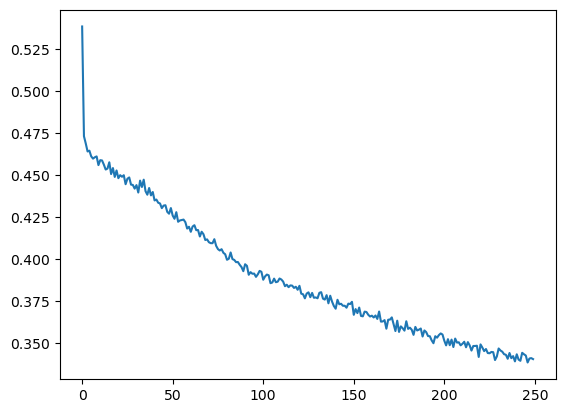

In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming data_c is already defined
X = data_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = data_c.loc[:, 'Out1']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping the input for LSTM
timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Defining the Bi-LSTM model
bilstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=, activation='tanh', input_shape=(timesteps, features // timesteps)),
    #layers.LSTM(units=30, activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    #layers.LSTM(units=30, activation='tanh', return_sequences=True),
    #layers.Bidirectional(layers.LSTM(units=70, activation='tanh')),
    layers.Dropout(0.5),
    layers.Dense(units=1),
])

# Compiling the model
bilstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Optional: Define a custom callback for R2 score
class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred = self.model.predict(X_val, verbose=0)
        ss_res = np.sum((y_val - y_pred) ** 2)
        ss_tot = np.sum((y_val - np.mean(y_val)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        print(f'Epoch {epoch+1}: R2 Score = {r2_score:.4f}')

# Training the Bi-LSTM model
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
bilstm_model.fit(X_train, y_train, batch_size=32, callbacks=[r2_callback], epochs=250)

# Convert training history to a DataFrame
bilstm_model_df = pd.DataFrame(bilstm_model.history.history)

# Plotting the loss
bilstm_model_df['loss'].plot();

# Making predictions
y_pred_bilstm = bilstm_model.predict(X_test)


R2 Score: 0.6419509740370795
SSE: 856.8011022206176
MAE: 0.40900200238901874
AIC: 4663.685943556103
BIC: 4693.436692994363


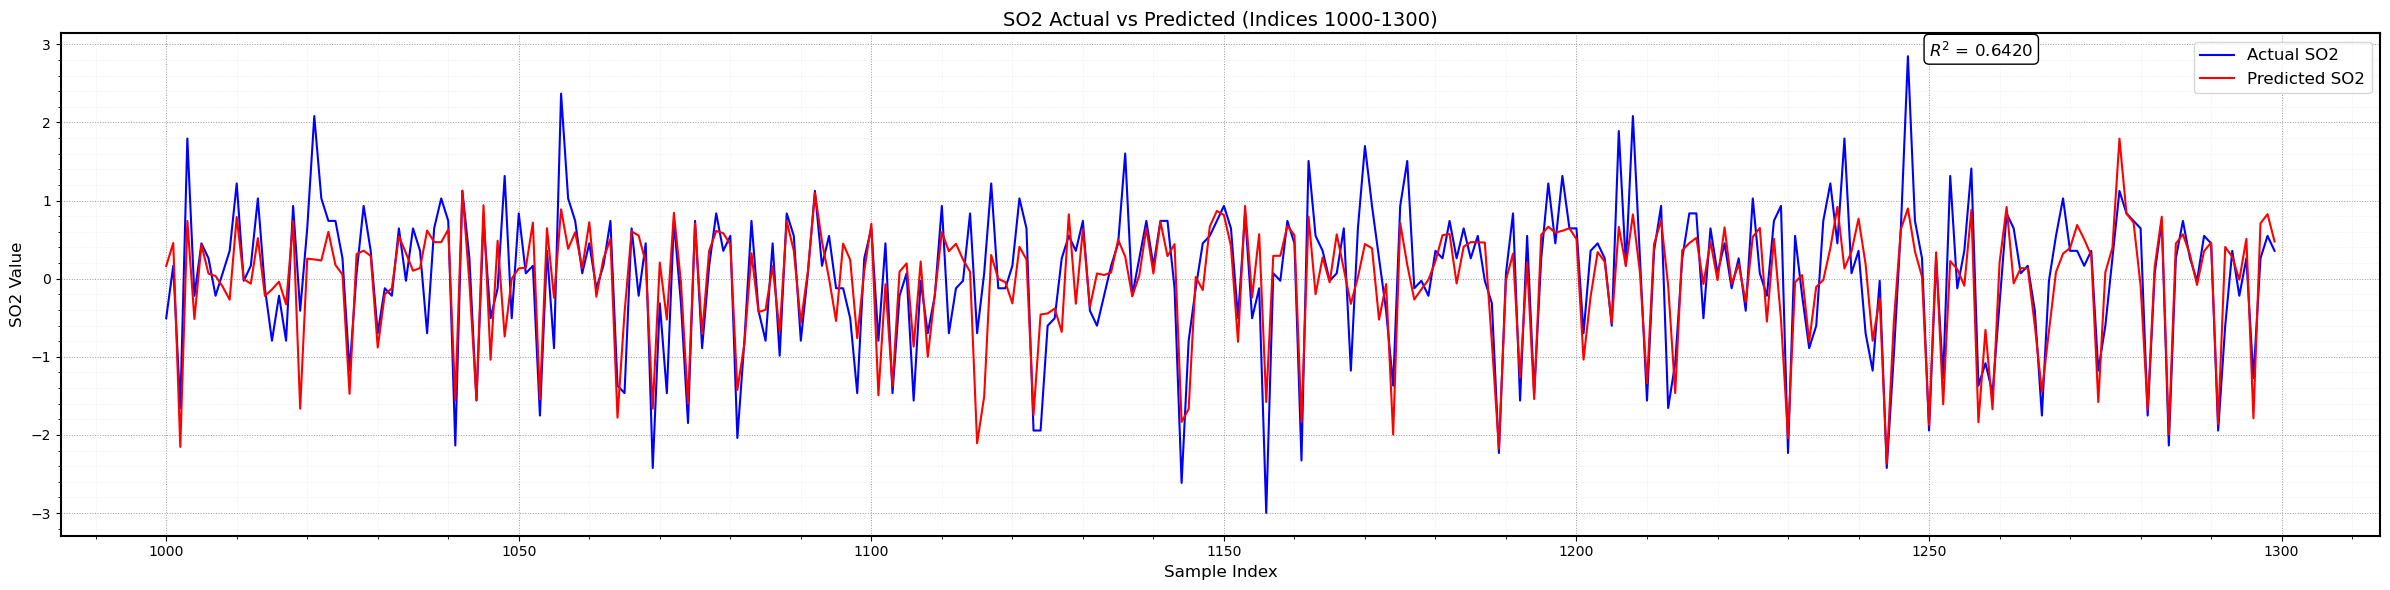

In [39]:
result(y_test,y_pred_bilstm,5)